##### [실습] titanic 승객 데이터 활용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.TTc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

**컬럼 설명** 
- PassengerId - 승객 고유번호
- Survived - 생존유무(target 값) (0 = 사망, 1 = 생존)
- Pclass - 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - 탑승객 성명
- Sex - 성별 (male: 남성, female: 여성)
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Ticket - 티켓 넘버
- Fare - 탑승 요금
- Cabin - 객실 넘버
- Embarked - 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)

In [3]:
# titanic.csv 파일 로드
# titanic 데이터셋의 메타 데이터 확인

titanic = pd.read_csv('./data/titanic.csv')
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 기초문제

In [4]:
# 1. 전체 승객 중 생존자의 수와 사망자의 수를 구하여 출력
survived = pd.DataFrame(titanic['Survived'].value_counts().rename({0: '사망자', 1: '생존자'}))
print(survived)


print(titanic['Survived'].value_counts())

          count
Survived       
사망자         549
생존자         342
Survived
0    549
1    342
Name: count, dtype: int64


In [5]:
# 2. 승객 나이의 평균 출력
print(titanic['Age'].mean())

29.69911764705882


In [6]:
# 3. 1등급 승객 중 운임이 가장 높은 승객의 이름 출력
sorted_titanic = titanic.sort_values(['Pclass', 'Fare'], ascending=[True, False])
print(sorted_titanic.iloc[0]['Name'])

Ward, Miss. Anna


In [7]:
# 4. 여성 승객의 수를 구하여 출력
print(titanic.value_counts('Sex')['female'])

314


In [8]:
# 5. 운임이 50 이상인 승객의 이름과 운임 출력
print(titanic[titanic['Age'] >= 50][['Name', 'Fare']])

                                                  Name     Fare
6                              McCarthy, Mr. Timothy J  51.8625
11                            Bonnell, Miss. Elizabeth  26.5500
15                    Hewlett, Mrs. (Mary D Kingcome)   16.0000
33                               Wheadon, Mr. Edward H  10.5000
54                      Ostby, Mr. Engelhart Cornelius  61.9792
..                                                 ...      ...
820  Hays, Mrs. Charles Melville (Clara Jennings Gr...  93.5000
829          Stone, Mrs. George Nelson (Martha Evelyn)  80.0000
851                                Svensson, Mr. Johan   7.7750
857                             Daly, Mr. Peter Denis   26.5500
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  83.1583

[74 rows x 2 columns]


In [9]:
# 6. 나이가 18세 미만인 승객들의 생존율을 계산하여 출력
survived = titanic[titanic['Age'] < 18].value_counts('Survived')[1]
unsurvived = titanic[titanic['Age'] < 18].value_counts('Survived')[0]
print(survived / (survived + unsurvived))

0.5398230088495575


In [10]:
# 7. 2등급 객실에 탑승한 승객의 평균 운임을 계산하여 출력
print(titanic[titanic['Pclass'] == 2]['Fare'].mean())

20.662183152173913


In [11]:
# 8. 승객 중 나이가 가장 많은 사람의 나이와 이름을 출력
print(titanic.sort_values('Age', ascending=False).iloc[0][['Age', 'Name']])

Age                                     80.0
Name    Barkworth, Mr. Algernon Henry Wilson
Name: 630, dtype: object


In [12]:
# 9. S 항구에서 탑승한 승객의 수를 출력
print(titanic.value_counts('Embarked')['S'])

644


In [13]:
# 10. 3등급 객실에 탑승한 남성 승객 중 생존자의 수를 출력
print(titanic[titanic['Pclass'] == 3].value_counts('Survived')[1])

119


- 고급문제

In [14]:
# 1. 생존자(Survived)와 그렇지 않은 사람들의 `Pclass`(객실 등급)별 평균 나이를 각각 출력
titanic_group_survived = titanic.groupby(['Survived', 'Pclass'])

print(titanic_group_survived['Age'].mean())

Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64


In [15]:
# 2. `SibSp`(형제/배우자 수)가 3 이상인 승객들 중에서, `Fare`(운임) 상위 5명의 이름과 나이를 출력
print(titanic[titanic['SibSp'] >= 3].sort_values('Fare', ascending=False).iloc[:5][['Name', 'Age']])

                               Name   Age
27   Fortune, Mr. Charles Alexander  19.0
88       Fortune, Miss. Mabel Helen  23.0
341  Fortune, Miss. Alice Elizabeth  24.0
159      Sage, Master. Thomas Henry   NaN
180    Sage, Miss. Constance Gladys   NaN


<Axes: >

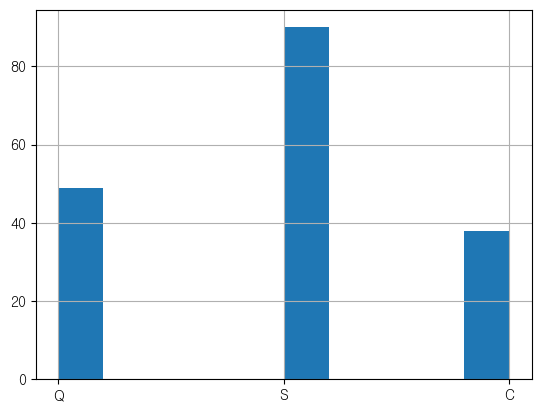

In [16]:
# 3. 승객 중에서 `Age` 값이 결측치(NaN)인 사람들의 `Embarked`(탑승 항구)별 분포를 출력

titanic[titanic['Age'].isna()]['Embarked'].hist()

In [17]:
# 4. 나이가 16세 미만이고, 혼자 탑승한(`SibSp == 0` and `Parch == 0`) 승객의 이름과 성별, 생존 여부를 출력
titanic[(titanic['Age'] < 16) & (titanic['SibSp'] == 0) & (titanic['Parch'] == 0)][['Name', 'Sex', 'Survived']]

,Name,Sex,Survived
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,0
22,"McGowan, Miss. Anna ""Annie""",female,1
731,"Hassan, Mr. Houssein G N",male,0
777,"Emanuel, Miss. Virginia Ethel",female,1
780,"Ayoub, Miss. Banoura",female,1
875,"Najib, Miss. Adele Kiamie ""Jane""",female,1


In [18]:
# 5. 1등급(Pclass == 1) 객실에 탑승한 승객들 중에서, 운임(Fare)이 평균보다 높은 사람들의 이름과 나이, 운임을 출력
titanic[(titanic['Pclass'] == 1) & (titanic['Fare'] > titanic['Fare'].mean())][['Name', 'Age', 'Fare']]

,Name,Age,Fare
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
6,"McCarthy, Mr. Timothy J",54.0,51.8625
23,"Sloper, Mr. William Thompson",28.0,35.5000
27,"Fortune, Mr. Charles Alexander",19.0,263.0000
...,...,...,...
853,"Lines, Miss. Mary Conover",16.0,39.4000
856,"Wick, Mrs. George Dennick (Mary Hitchcock)",45.0,164.8667
867,"Roebling, Mr. Washington Augustus II",31.0,50.4958
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,52.5542


In [19]:
# 6. 나이(Age), 객실 등급(Pclass), 운임(Fare) 값에 결측치가 없는 승객들만 대상으로, 각 등급별 평균 운임과 중앙값 운임을 출력
titanic_group_Pclass = titanic[['Name', 'Pclass', 'Fare']].dropna(how='any').groupby('Pclass').mean('Fare')

print(F"평균 : {float(titanic_group_Pclass.mean())}, 중앙값 : {float(titanic_group_Pclass.median())}")
# Length: 714 

평균 : 39.49747358466897, 중앙값 : 20.662183152173913


C:\Users\Playdata\AppData\Local\Temp\ipykernel_16464\4017799761.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(F"평균 : {float(titanic_group_Pclass.mean())}, 중앙값 : {float(titanic_group_Pclass.median())}")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_16464\4017799761.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(F"평균 : {float(titanic_group_Pclass.mean())}, 중앙값 : {float(titanic_group_Pclass.median())}")


In [20]:
# 7. 승객들의 `Embarked` 별 평균 나이를 계산하고, 가장 많은 승객이 탑승한 항구를 기준으로 생존율을 계산하여 출력
print(titanic[['Embarked', 'Age']].groupby('Embarked').mean('Age'))
most_embarked = str(titanic[['Embarked']].value_counts(ascending=False).index[0][0])
print(f"가장 많이 탑승한 항구 생존자 / 전체 탑승자 : {len(titanic[(titanic['Survived'] == 1) & (titanic['Embarked'] == most_embarked)])/len(titanic['Survived'])}")
print(f"가장 많이 탑승한 항구 생존자 / 가장 많이 탑승한 항구 탑승자 : {len(titanic[(titanic['Survived'] == 1) & (titanic['Embarked'] == most_embarked)])/len(titanic[titanic['Embarked'] == most_embarked])}")

                Age
Embarked           
C         30.814769
Q         28.089286
S         29.445397
가장 많이 탑승한 항구 생존자 / 전체 탑승자 : 0.24354657687991021
가장 많이 탑승한 항구 생존자 / 가장 많이 탑승한 항구 탑승자 : 0.33695652173913043


In [21]:
# 8. 승객 중에서 여성(`Sex == 'female'`)이면서 30세 이상인 사람들의 생존율을 계산하여 출력
print(len(titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >= 30) & (titanic['Survived'] == 1)])/len(titanic['Survived']))

0.10325476992143659


In [22]:
# 9. 동반한 형제 또는 배우자 수(`SibSp`)와 부모 또는 자녀 수(`Parch`)의 합이 3 이상인 승객들만을 대상으로, 그들의 생존율을 계산하여 출력
print(len(titanic[(titanic['SibSp'] + titanic['Parch'] >= 3) & (titanic['Survived'] == 1)])/len(titanic[titanic['SibSp'] + titanic['Parch'] >= 3]))

0.34065934065934067


In [23]:
# 10. `Cabin`(객실 번호) 정보가 있는 승객들만을 대상으로, 그들의 생존율을 객실 등급별로 구분하여 계산하여 출력
# for i in range()
# titanic[(titanic['Cabin'].isna() == False) & (titanic['Survived'] == 1)][['Pclass', 'Survived']].groupby('Pclass').value_counts()